### Basic Stats - 2
Problem Statement : Hospital Patient Data Analysis
Context:
A hospital maintains patient records including admission details, department, diagnosis, doctor, and bill amount.
You have two datasets: one with patient info and another with billing details.
Some patients have blank bill amounts, and there are multiple rows for the same patient due to follow-ups.


## 1.Load patient dataset 

In [160]:
import numpy as np
import pandas as pd
patients = pd.read_csv("Patient_Data.csv")
billing = pd.read_csv("Billing_Data.csv") ##we can do same process for billingdata also
import warnings
warnings.filterwarnings('ignore')

In [161]:
patients.head

<bound method NDFrame.head of    PatientID     Name   Department     Doctor  BillAmount  ReceptionistID  \
0        101    Alice   Cardiology  Dr. Smith      5000.0               1   
1        102      Bob    Neurology   Dr. John         NaN               2   
2        103  Charlie  Orthopedics    Dr. Lee      7500.0               1   
3        104    David   Cardiology  Dr. Smith      6200.0               3   
4        105      Eva  Dermatology   Dr. Rose         NaN               2   
5        101    Alice   Cardiology  Dr. Smith      5000.0               1   

        CheckInTime  
0  2023-01-10 09:00  
1  2023-01-11 10:30  
2  2023-01-12 11:00  
3  2023-01-13 12:00  
4  2023-01-14 08:45  
5  2023-01-10 09:00  >

In [162]:
patients.head() #display(patients.head())

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime
0,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00
1,102,Bob,Neurology,Dr. John,NaN,2,2023-01-11 10:30
2,103,Charlie,Orthopedics,Dr. Lee,7500.0,1,2023-01-12 11:00
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00
4,105,Eva,Dermatology,Dr. Rose,NaN,2,2023-01-14 08:45


In [163]:
patients.tail()

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime
1,102,Bob,Neurology,Dr. John,NaN,2,2023-01-11 10:30
2,103,Charlie,Orthopedics,Dr. Lee,7500.0,1,2023-01-12 11:00
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00
4,105,Eva,Dermatology,Dr. Rose,NaN,2,2023-01-14 08:45
5,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00


In [164]:
billing.head()

,PatientID,InsuranceCovered,FinalAmount
0,101,2000,3000
1,102,1500,3500
2,103,2500,5000
3,104,3000,3200
4,105,1000,4000


In [165]:
print("\nPATIENTS DATA INFO:")
patients.info()


PATIENTS DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientID       6 non-null      int64  
 1   Name            6 non-null      object 
 2   Department      6 non-null      object 
 3   Doctor          6 non-null      object 
 4   BillAmount      4 non-null      float64
 5   ReceptionistID  6 non-null      int64  
 6   CheckInTime     6 non-null      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 468.0+ bytes


In [166]:
patients.duplicated().sum()

np.int64(1)

In [167]:
patients[patients.duplicated()]

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime
5,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00


In [168]:
billing.duplicated().sum()

np.int64(0)

## 2.Selects relevant columns for billing

In [169]:
relevant_cols = ['PatientID', 'Department', 'Doctor', 'BillAmount'] #relevent columns
available_relevant = [c for c in relevant_cols if c in patients.columns] #keep columns only exits in dataset

patients_selected = patients[available_relevant].copy() ##creates new dataframe with those columns
print("\nSelected billing-relevant columns:")
display(patients_selected.head())


Selected billing-relevant columns:


,PatientID,Department,Doctor,BillAmount
0,101,Cardiology,Dr. Smith,5000.0
1,102,Neurology,Dr. John,NaN
2,103,Orthopedics,Dr. Lee,7500.0
3,104,Cardiology,Dr. Smith,6200.0
4,105,Dermatology,Dr. Rose,NaN


## 3.Dropping administrative columns recepID,CheCkinTime

In [170]:
admin_cols = ['ReceptionistID', 'CheckInTime']
patients_clean = patients.drop(columns=[c for c in admin_cols if c in patients.columns], errors='ignore').copy()
print("\nDropped administrative columns\nRemaining columns:")
print(patients_clean.columns.tolist())


Dropped administrative columns
Remaining columns:
['PatientID', 'Name', 'Department', 'Doctor', 'BillAmount']


## 4.Total bill per department

In [171]:
billing_cols = ['PatientID', 'Department', 'Doctor', 'BillAmount']
available_cols = [col for col in billing_cols if col in patients.columns]
patients_billing = patients[available_cols].copy()

#Display the selected data
print("Selected billing-relevant columns:")
print(patients_billing.head())

if 'Department' in patients_billing.columns and 'BillAmount' in patients_billing.columns:dept_total = (
patients_billing.groupby('Department', dropna=False)['BillAmount']
.sum()
.reset_index()
.sort_values('BillAmount', ascending=False)
)

Selected billing-relevant columns:
   PatientID   Department     Doctor  BillAmount
0        101   Cardiology  Dr. Smith      5000.0
1        102    Neurology   Dr. John         NaN
2        103  Orthopedics    Dr. Lee      7500.0
3        104   Cardiology  Dr. Smith      6200.0
4        105  Dermatology   Dr. Rose         NaN


## 5.removing duplicate patient records based on patientID

In [172]:
if 'PatientID' in patients_clean.columns:
    before = patients_clean.shape[0]
    patients_nodup = patients_clean.drop_duplicates(subset=['PatientID'], keep='first').copy()
    after = patients_nodup.shape[0]
    print(f"\nRemoved {before - after} duplicate records.")
else:
    print("\nNo 'PatientID' column found — skipping duplicate removal.")
    patients_nodup = patients_clean.copy()


Removed 1 duplicate records.


## 6.Filling missing BillAmount values with mean bill 

In [173]:
patients.isnull()

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False


In [174]:
patients.isnull().sum()

PatientID         0
Name              0
Department        0
Doctor            0
BillAmount        2
ReceptionistID    0
CheckInTime       0
dtype: int64

In [175]:
patients[patients['BillAmount'].isnull()] #these are missing values in billamount

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime
1,102,Bob,Neurology,Dr. John,NaN,2,2023-01-11 10:30
4,105,Eva,Dermatology,Dr. Rose,NaN,2,2023-01-14 08:45


In [176]:
patients.fillna({'BillAmount':patients['BillAmount'].mean()},inplace=True) 

In [177]:
patients.isnull().sum()

PatientID         0
Name              0
Department        0
Doctor            0
BillAmount        0
ReceptionistID    0
CheckInTime       0
dtype: int64

## 7.Merging billing data with patient data on patientID

In [178]:
#check column names to confirm correct merge key
print("Patient Data Columns:", patients.columns.tolist())
print("Billing Data Columns:", billing.columns.tolist())

#Merge the two datasets on 'PatientID'
merged_df = pd.merge(patients, billing, on='PatientID', how='inner')

print("Merged dataset shape:", merged_df.shape)
print(merged_df.head())

Patient Data Columns: ['PatientID', 'Name', 'Department', 'Doctor', 'BillAmount', 'ReceptionistID', 'CheckInTime']
Billing Data Columns: ['PatientID', 'InsuranceCovered', 'FinalAmount']
Merged dataset shape: (6, 9)
   PatientID     Name   Department     Doctor  BillAmount  ReceptionistID  \
0        101    Alice   Cardiology  Dr. Smith      5000.0               1   
1        102      Bob    Neurology   Dr. John      5925.0               2   
2        103  Charlie  Orthopedics    Dr. Lee      7500.0               1   
3        104    David   Cardiology  Dr. Smith      6200.0               3   
4        105      Eva  Dermatology   Dr. Rose      5925.0               2   

        CheckInTime  InsuranceCovered  FinalAmount  
0  2023-01-10 09:00              2000         3000  
1  2023-01-11 10:30              1500         3500  
2  2023-01-12 11:00              2500         5000  
3  2023-01-13 12:00              3000         3200  
4  2023-01-14 08:45              1000         4000  


In [179]:
merged_df.head() #final merged data

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime,InsuranceCovered,FinalAmount
0,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00,2000,3000
1,102,Bob,Neurology,Dr. John,5925.0,2,2023-01-11 10:30,1500,3500
2,103,Charlie,Orthopedics,Dr. Lee,7500.0,1,2023-01-12 11:00,2500,5000
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00,3000,3200
4,105,Eva,Dermatology,Dr. Rose,5925.0,2,2023-01-14 08:45,1000,4000


In [180]:
merged_df.tail()

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime,InsuranceCovered,FinalAmount
1,102,Bob,Neurology,Dr. John,5925.0,2,2023-01-11 10:30,1500,3500
2,103,Charlie,Orthopedics,Dr. Lee,7500.0,1,2023-01-12 11:00,2500,5000
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00,3000,3200
4,105,Eva,Dermatology,Dr. Rose,5925.0,2,2023-01-14 08:45,1000,4000
5,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00,2000,3000


## 8.Concatenate new patient data

In [181]:
new_patients = pd.DataFrame({
    'PatientID': [9991, 9992],
    'Name': ['John Doe', 'Jane Roe'],
    'Department': ['Cardiology', 'Neurology'],
    'Doctor': ['Dr. Smith', 'Dr. Brown'],
    'BillAmount': [8000, 6200],
    'ReceptionistID':[110,112],
    'CheckInTime':['2025-10-25 09:30','2025-10-26 10:15']
})

merged_df = pd.concat([merged_df, new_patients], axis=0, ignore_index=True)
print("\nAfter adding new patients:\n", merged_df.tail())


After adding new patients:
    PatientID      Name   Department     Doctor  BillAmount  ReceptionistID  \
3        104     David   Cardiology  Dr. Smith      6200.0               3   
4        105       Eva  Dermatology   Dr. Rose      5925.0               2   
5        101     Alice   Cardiology  Dr. Smith      5000.0               1   
6       9991  John Doe   Cardiology  Dr. Smith      8000.0             110   
7       9992  Jane Roe    Neurology  Dr. Brown      6200.0             112   

        CheckInTime  InsuranceCovered  FinalAmount  
3  2023-01-13 12:00            3000.0       3200.0  
4  2023-01-14 08:45            1000.0       4000.0  
5  2023-01-10 09:00            2000.0       3000.0  
6  2025-10-25 09:30               NaN          NaN  
7  2025-10-26 10:15               NaN          NaN  


In [182]:
merged_df.tail()

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime,InsuranceCovered,FinalAmount
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00,3000.0,3200.0
4,105,Eva,Dermatology,Dr. Rose,5925.0,2,2023-01-14 08:45,1000.0,4000.0
5,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00,2000.0,3000.0
6,9991,John Doe,Cardiology,Dr. Smith,8000.0,110,2025-10-25 09:30,NaN,NaN
7,9992,Jane Roe,Neurology,Dr. Brown,6200.0,112,2025-10-26 10:15,NaN,NaN


## 9.Concanating new billing category columns like ['insuranceCovered','FinalAmount'] column wise

In [183]:
insurance_col = pd.Series(np.random.choice([True, False], size=len(merged_df)), name='InsuranceCovered')

#Create a column for final amount
# Apply a 20% discount if insurance is covered
final_amount_col = pd.Series(
    merged_df['BillAmount'] * np.where(insurance_col, 0.8, 1.0),
    name='FinalAmount'
)

#Concatenate (add) the new columns to your dataset (column-wise)
final_df = pd.concat([merged_df, insurance_col, final_amount_col], axis=1)

#Preview the final dataset
print("Final dataset with new billing category columns:")
print(final_df.head())

Final dataset with new billing category columns:
   PatientID     Name   Department     Doctor  BillAmount  ReceptionistID  \
0        101    Alice   Cardiology  Dr. Smith      5000.0               1   
1        102      Bob    Neurology   Dr. John      5925.0               2   
2        103  Charlie  Orthopedics    Dr. Lee      7500.0               1   
3        104    David   Cardiology  Dr. Smith      6200.0               3   
4        105      Eva  Dermatology   Dr. Rose      5925.0               2   

        CheckInTime  InsuranceCovered  FinalAmount  InsuranceCovered  \
0  2023-01-10 09:00            2000.0       3000.0             False   
1  2023-01-11 10:30            1500.0       3500.0             False   
2  2023-01-12 11:00            2500.0       5000.0             False   
3  2023-01-13 12:00            3000.0       3200.0              True   
4  2023-01-14 08:45            1000.0       4000.0             False   

   FinalAmount  
0       5000.0  
1       5925.0  
2   

In [184]:
final_df.head()

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime,InsuranceCovered,FinalAmount,InsuranceCovered,FinalAmount
0,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00,2000.0,3000.0,False,5000.0
1,102,Bob,Neurology,Dr. John,5925.0,2,2023-01-11 10:30,1500.0,3500.0,False,5925.0
2,103,Charlie,Orthopedics,Dr. Lee,7500.0,1,2023-01-12 11:00,2500.0,5000.0,False,7500.0
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00,3000.0,3200.0,True,4960.0
4,105,Eva,Dermatology,Dr. Rose,5925.0,2,2023-01-14 08:45,1000.0,4000.0,False,5925.0


In [185]:
final_df.tail()

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime,InsuranceCovered,FinalAmount,InsuranceCovered,FinalAmount
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00,3000.0,3200.0,True,4960.0
4,105,Eva,Dermatology,Dr. Rose,5925.0,2,2023-01-14 08:45,1000.0,4000.0,False,5925.0
5,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00,2000.0,3000.0,True,4000.0
6,9991,John Doe,Cardiology,Dr. Smith,8000.0,110,2025-10-25 09:30,NaN,NaN,True,6400.0
7,9992,Jane Roe,Neurology,Dr. Brown,6200.0,112,2025-10-26 10:15,NaN,NaN,True,4960.0


In [186]:
final_df.isnull().sum()

PatientID           0
Name                0
Department          0
Doctor              0
BillAmount          0
ReceptionistID      0
CheckInTime         0
InsuranceCovered    2
FinalAmount         2
InsuranceCovered    0
FinalAmount         0
dtype: int64

#### All missing values will be handled across patientID in merged dataset

In [187]:
#DataFrame is clean and index is reset
final_df = final_df.reset_index(drop=True)

#Remove duplicate columns that came from multiple concatenations
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

#Check and fix column lengths
print("DataFrame length:", len(final_df))
if 'BillAmount' not in final_df.columns:
    raise KeyError("'BillAmount' column missing from final_df!")

#If InsuranceCovered column is wrong length or missing,recreate it
if 'InsuranceCovered' not in final_df.columns or len(final_df['InsuranceCovered']) != len(final_df):
    print("Recreating 'InsuranceCovered' column ...")
    final_df['InsuranceCovered'] = np.random.choice([True, False], size=len(final_df))

#Ensure column type is boolean
final_df['InsuranceCovered'] = final_df['InsuranceCovered'].astype(bool)

#Fill missing values
final_df['InsuranceCovered'].fillna(False, inplace=True)
final_df['BillAmount'].fillna(final_df['BillAmount'].mean(), inplace=True)

#calculate FinalAmount
final_df['FinalAmount'] = np.where(final_df['InsuranceCovered'],
                                   final_df['BillAmount'] * 0.8,
                                   final_df['BillAmount'])

#results
print("\nAfter fixing:")
print(final_df.isnull().sum())
print(final_df[['PatientID', 'BillAmount', 'InsuranceCovered', 'FinalAmount']].head())

#Saving final cleaned file
final_df.to_csv("Final_Cleaned_Patient_Billing_Data.csv", index=False)
print("\nFinal cleaned dataset saved successfully as 'Final_Cleaned_Patient_Billing_Data.csv'")

DataFrame length: 8

After fixing:
PatientID           0
Name                0
Department          0
Doctor              0
BillAmount          0
ReceptionistID      0
CheckInTime         0
InsuranceCovered    0
FinalAmount         0
dtype: int64
   PatientID  BillAmount  InsuranceCovered  FinalAmount
0        101      5000.0              True       4000.0
1        102      5925.0              True       4740.0
2        103      7500.0              True       6000.0
3        104      6200.0              True       4960.0
4        105      5925.0              True       4740.0

Final cleaned dataset saved successfully as 'Final_Cleaned_Patient_Billing_Data.csv'


In [188]:
final_df.tail()

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime,InsuranceCovered,FinalAmount
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00,True,4960.0
4,105,Eva,Dermatology,Dr. Rose,5925.0,2,2023-01-14 08:45,True,4740.0
5,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00,True,4000.0
6,9991,John Doe,Cardiology,Dr. Smith,8000.0,110,2025-10-25 09:30,True,6400.0
7,9992,Jane Roe,Neurology,Dr. Brown,6200.0,112,2025-10-26 10:15,True,4960.0


In [189]:
final_df.isnull().sum()

PatientID           0
Name                0
Department          0
Doctor              0
BillAmount          0
ReceptionistID      0
CheckInTime         0
InsuranceCovered    0
FinalAmount         0
dtype: int64

In [190]:
final_df.to_csv("Final_Cleaned_Patient_Billing_Data.csv", index=False)
print("Final cleaned dataset saved successfully!")

Final cleaned dataset saved successfully!


#### Department wise revenue,doctor performance

In [191]:
#Total revenue (sum of FinalAmount) per department
dept_revenue = merged_df.groupby('Department')['FinalAmount'].sum().reset_index()

#Renaming for clarity
dept_revenue.rename(columns={'FinalAmount': 'TotalRevenue'}, inplace=True)

print("Department-wise Total Revenue:")
print(dept_revenue)

Department-wise Total Revenue:
    Department  TotalRevenue
0   Cardiology        9200.0
1  Dermatology        4000.0
2    Neurology        3500.0
3  Orthopedics        5000.0


In [192]:
import numpy as np
import pandas as pd
merged_df['BillAmount'] = pd.to_numeric(merged_df['BillAmount'], errors='coerce')
mean_bill = merged_df['BillAmount'].mean()
merged_df['BillAmount'].fillna(mean_bill, inplace=True)

#Ensure InsuranceCovered column is present and clean
if 'InsuranceCovered' not in merged_df.columns:
    merged_df['InsuranceCovered'] = False
merged_df['InsuranceCovered'] = merged_df['InsuranceCovered'].fillna(False).astype(bool)

#Recalculate FinalAmount correctly
merged_df['FinalAmount'] = np.where(
    merged_df['InsuranceCovered'],
    merged_df['BillAmount'] * 0.8,   # 20% discount if insured
    merged_df['BillAmount']
)

#Verify all missing values handled
print("Missing values after cleanup:")
print(merged_df.isnull().sum())

#Generate updated Doctor Performance Summary
doctor_perf = merged_df.groupby('Doctor').agg(
    TotalPatients=('PatientID', 'count'),
    TotalRevenue=('FinalAmount', 'sum'),
    AvgBill=('FinalAmount', 'mean')
).reset_index()

print("\nUpdated Doctor Performance Summary:")
print(doctor_perf)

Missing values after cleanup:
PatientID           0
Name                0
Department          0
Doctor              0
BillAmount          0
ReceptionistID      0
CheckInTime         0
InsuranceCovered    0
FinalAmount         0
dtype: int64

Updated Doctor Performance Summary:
      Doctor  TotalPatients  TotalRevenue  AvgBill
0  Dr. Brown              1        6200.0   6200.0
1   Dr. John              1        4740.0   4740.0
2    Dr. Lee              1        6000.0   6000.0
3   Dr. Rose              1        4740.0   4740.0
4  Dr. Smith              4       20960.0   5240.0


In [193]:
# Average FinalAmount and total revenue per doctor
doctor_perf = merged_df.groupby('Doctor').agg(
    TotalPatients=('PatientID', 'count'),
    TotalRevenue=('FinalAmount', 'sum'),
    AvgBill=('FinalAmount', 'mean')
).reset_index()

print("\nDoctor Performance Summary:")
print(doctor_perf)


Doctor Performance Summary:
      Doctor  TotalPatients  TotalRevenue  AvgBill
0  Dr. Brown              1        6200.0   6200.0
1   Dr. John              1        4740.0   4740.0
2    Dr. Lee              1        6000.0   6000.0
3   Dr. Rose              1        4740.0   4740.0
4  Dr. Smith              4       20960.0   5240.0


In [194]:
#Save updated dataset
merged_df.to_csv("Final_Cleaned_Patient_Billing_Data.csv", index=False)
print("\nFinal cleaned dataset saved successfully as 'Final_Cleaned_Patient_Billing_Data.csv'")


Final cleaned dataset saved successfully as 'Final_Cleaned_Patient_Billing_Data.csv'


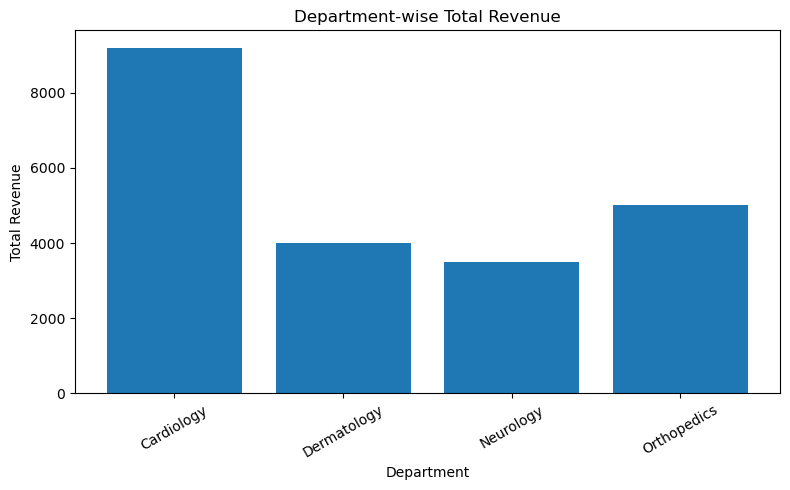

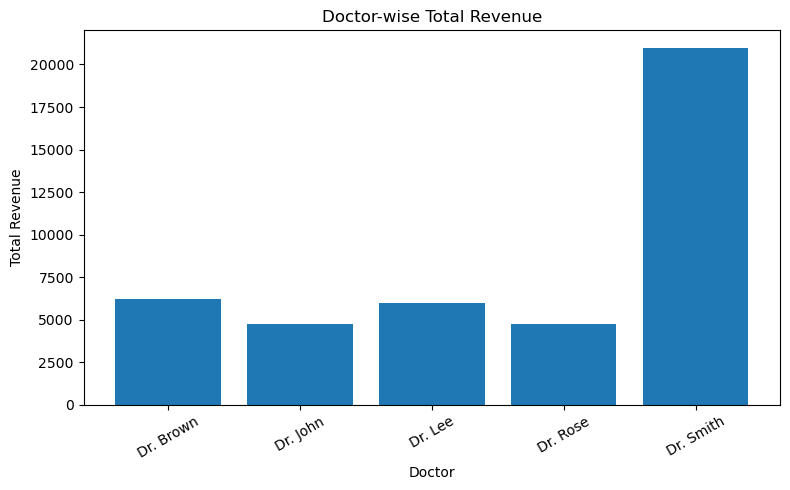

In [196]:
#Visual representation
import matplotlib.pyplot as plt

#Department-wise revenue
plt.figure(figsize=(8,5))
plt.bar(dept_revenue['Department'], dept_revenue['TotalRevenue'])
plt.title('Department-wise Total Revenue')
plt.xlabel('Department')
plt.ylabel('Total Revenue')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#Doctor performance
plt.figure(figsize=(8,5))
plt.bar(doctor_perf['Doctor'], doctor_perf['TotalRevenue'])
plt.title('Doctor-wise Total Revenue')
plt.xlabel('Doctor')
plt.ylabel('Total Revenue')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()